In [1]:
#KNN classifier
import pandas as pd
import numpy as np 
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score

c:\Users\Rachel\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
final_df = pd.read_csv('../../Datasets/final_df.csv')  
final_df

# drop first column
final_df.drop('Unnamed: 0', axis='columns', inplace=True)
final_df.head()

,Emotions_with_gender,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5,Emotions_without_gender
0,13,Ravdess\03-01-01-01-01-01-01.wav,-697.79260,54.890040,0.663466,12.435786,7.733952,0.530750,-3.216631,-3.159394,...,0.000005,0.000004,3.206722e-07,-0.049044,0.020024,-0.018065,-0.064224,0.014611,0.006371,5
1,5,Ravdess\03-01-01-01-01-01-02.wav,-650.71090,54.477303,-9.090127,8.411754,-4.387536,-3.765706,-5.362752,-8.610381,...,0.000006,0.000004,3.992178e-07,-0.019344,0.012139,0.013491,-0.040532,0.006054,0.002813,5
2,13,Ravdess\03-01-01-01-01-01-03.wav,-614.73914,56.708190,-2.685535,10.650176,4.240806,-2.472097,-12.035720,-6.654510,...,0.000071,0.000045,4.472179e-06,-0.013746,-0.006525,0.013147,-0.001333,0.005258,-0.001753,5
3,5,Ravdess\03-01-01-01-01-01-04.wav,-695.85030,42.934265,-7.274557,8.977729,-4.170579,-4.924890,-6.537960,-12.679187,...,0.000013,0.000006,6.443871e-07,-0.006601,0.012613,-0.023542,0.016175,-0.010311,0.000834,5
4,13,Ravdess\03-01-01-01-01-01-05.wav,-713.43350,68.360940,7.989171,15.139791,11.715775,0.430983,1.002558,-2.773119,...,0.000002,0.000001,7.229193e-08,-0.023409,0.016632,-0.042659,0.019653,0.014472,0.010889,5


## SMOTE

In [3]:
final_df_testing = final_df.copy()
X_clean = final_df_testing.drop(columns=['Path', 'Emotions_without_gender','Emotions_with_gender'], axis=1)
y_clean = final_df_testing['Emotions_with_gender']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle imbalance classes with SMOTE for training dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

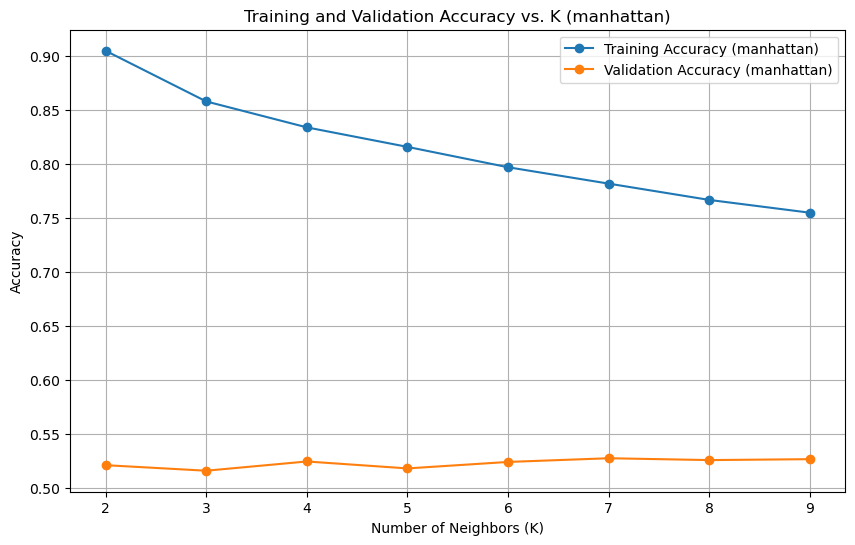

Optimal k for manhattan distance: 7


In [11]:
k_values = range(2, 10)

train_scores_manhattan = []
val_scores_manhattan = []

# Loop through each value of k
for k in k_values:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    
    # Fit KNN classifier to training data
    knn_manhattan.fit(X_train_resampled, y_train_resampled)
    
    # Calculate training accuracy
    train_score = knn_manhattan.score(X_train_resampled, y_train_resampled)
    train_scores_manhattan.append(train_score)
    
    # Calculate validation accuracy
    val_score = knn_manhattan.score(X_test_scaled, y_test)  
    val_scores_manhattan.append(val_score)

# Plot training and validation accuracy scores for Euclidean distance
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores_manhattan, label='Training Accuracy (manhattan)', marker='o')
plt.plot(k_values, val_scores_manhattan, label='Validation Accuracy (manhattan)', marker='o')
plt.title('Training and Validation Accuracy vs. K (manhattan)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal k value based on the peak validation accuracy for Euclidean distance
best_k_manhattan = k_values[np.argmax(val_scores_manhattan)]
print(f'Optimal k for manhattan distance: {best_k_manhattan}')

In [6]:
# Train KNN model 
classifier_clean = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='manhattan')
classifier_clean.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_clean = classifier_clean.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print(f'Accuracy on test set: {accuracy_clean:.4f}')

Accuracy on test set: 0.5276


c:\Users\Rachel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Manhattan produced a higher accuracy on the test set

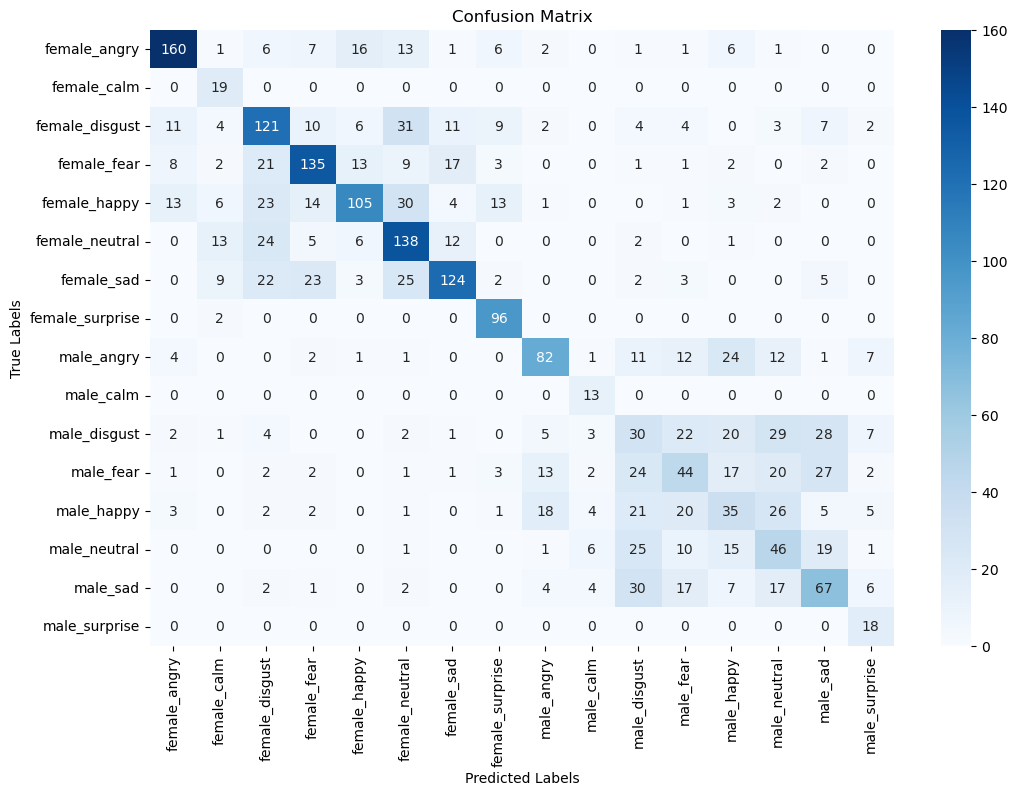

In [7]:
# Calculate confusion matrix
confusion_matrix_clean = confusion_matrix(y_test, y_pred_clean)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

confusion_df = pd.DataFrame(confusion_matrix_clean, index=class_labels, columns=class_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [8]:
label_map_with_gender = {
    0: 'female_angry',
    1: 'female_calm',
    2: 'female_disgust',
    3: 'female_fear',
    4: 'female_happy',
    5: 'female_neutral',
    6: 'female_sad',
    7: 'female_surprise',
    8: 'male_angry',
    9: 'male_calm',
    10: 'male_disgust',
    11: 'male_fear',
    12: 'male_happy',
    13: 'male_neutral',
    14: 'male_sad',
    15: 'male_surprise'
}

class_labels = [label_map_with_gender[i] for i in range(len(label_map_with_gender))]

print(classification_report(y_test, y_pred_clean, target_names=class_labels))

                 precision    recall  f1-score   support

   female_angry       0.79      0.72      0.76       221
    female_calm       0.33      1.00      0.50        19
 female_disgust       0.53      0.54      0.54       225
    female_fear       0.67      0.63      0.65       214
   female_happy       0.70      0.49      0.58       215
 female_neutral       0.54      0.69      0.61       201
     female_sad       0.73      0.57      0.64       218
female_surprise       0.72      0.98      0.83        98
     male_angry       0.64      0.52      0.57       158
      male_calm       0.39      1.00      0.57        13
   male_disgust       0.20      0.19      0.20       154
      male_fear       0.33      0.28      0.30       159
     male_happy       0.27      0.24      0.26       143
   male_neutral       0.29      0.37      0.33       124
       male_sad       0.42      0.43      0.42       157
  male_surprise       0.38      1.00      0.55        18

       accuracy              